In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from ocrdgen.imgen.ops import imtext_ops

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
black_image = np.ones((250,250,3), 'uint8') * 255
img = Image.fromarray(black_image)

In [4]:
black_image.shape

(250, 250, 3)

In [5]:
res = imtext_ops.draw_text_normal(black_image, 'Test', (100,100), img_mode="RGB")

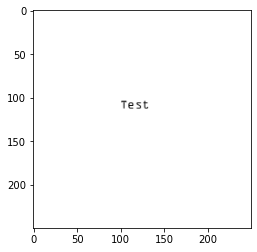

In [6]:
plt.imshow(res)

In [13]:
from typing import *
import numpy as np
from ocrdgen.ops import boxes_ops
from dataclasses import dataclass

#types
Point = Tuple[int,int]

@dataclass
class BBox:
    x: int
    y: int
    w: int
    h: int
    
    @property
    def xmin(self)->int:
        return int(self.x)

    @property
    def ymin(self)->int:
        return int(self.y)

    @property
    def xmax(self)->int:
        return int(self.x + self.w)
    
    @property
    def ymax(self)->int:
        return int(self.y + self.h)
    
    @property
    def width(self):
        return self.w
    
    @property
    def height(self):
        return self.h
    
    @property
    def size(self):
        return self.width, self.height
    
    def to_coordinate(self)->np.ndarray:
        xywh = self.x, self.y, self.w, self.h
        coord = boxes_ops.xywh_to_coord(xywh)
        return coord
    
    def to_xyminmax(self)->np.ndarray:
        xywh = self.x, self.y, self.w, self.h
        xymm = boxes_ops.xywh_to_xymm(xywh)
        return xymm
    
    def to_list(self):
        return [self.x, self.y, self.w, self.h]
    
    def copy(self)->"BBox":
        return BBox(self.x, self.y, self.w, self.h)
    


    

    

In [14]:
bbox = BBox(20,10,100,100)

In [15]:
bbox.to_coordinate()

array([[ 20,  10],
       [120,  10],
       [120, 110],
       [ 20, 110]])